
Model of "A compute-in-memory chip based on resistive random-access memory",
VLSI 2022
--------------------------------------------------------------------------------

Paper by Weier Wan, Rajkumar Kubendran, Clemens Schaefer, Sukru Burc Eryilmaz,
Wenqiang Zhang, Dabin Wu, Stephen Deiss, Priyanka Raina, He Qian, Bin Gao,
Siddharth Joshi, Huaqiang Wu, H.-S. Philip Wong, and Gert Cauwenberghs 

## Description of The Macro

The macro uses a 256x256 ReRAM array to compute MAC operations. N-bit inputs are
supplied one bit a time as ternary values (positive bits for positive values,
negative bits for negative values, and zero bits for zero values). Outputs from
each column of the array are accumulated in an analog accumulator before being
read out by an ADC. The analog accumulator has the unique ability to accumulate
outputs over multiple cycles, which allows the macro to process variable-bit
inputs, accumulate outputs over multiple cycles, and read out outputs with a
single ADC convert.

Some of the important variables for wan_nature_2022:

- *ARRAY_WORDLINES*: 256 rows in the array
- *ARRAY_BITLINES*: 256 columns in the array
- *ARRAY_PARALLEL_INPUTS*: 256 input slice(s) consumed in each cycle.
- *ARRAY_PARALLEL_WEIGHTS*: 65536 weights slice(s) used for computation in each cycle.
- *ARRAY_PARALLEL_OUTPUTS*: 256 output(s) produced in each cycle.
- *TECHNOLOGY*: 130 nm
- *ADC_RESOLUTION*: 8 bit(s)
- *DAC_RESOLUTION*: 1 bit(s)
- *N_ADC_PER_BANK*: 1 ADC(s)
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 10 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 4 bit(s)
- *BITS_PER_CELL*: 4 bit(s)
- *CIM_UNIT_WIDTH_CELLS*: 1 adjacent cell(s) in a wordline store bit(s) in one weight slice and process one input & output slice together
- *CIM_UNIT_DEPTH_CELLS*: 1 adjacent cell(s) in a bitline operate in separate cycles
- *CELL_CONFIG*: None 
- *GLOBAL_CYCLE_SECONDS*: 1.4485714285714284e-06 clock period

### Macro Level

- *Input Path*: Inputs are provided to the ternary row drivers to drive rows of
  the array. One input bit is processed in each cycle. For a positive input, the
  driver will supply a positive voltage for a 1 bit and no voltage for a 0 bit.
  For a negative input, the driver will supply a negative voltage for a 1 bit
  and no voltage for a 0 bit. The drivers require N cycles to process an N-bit
  input.
- *Weight Path*: Weight drivers are used to rewrite weights in the array. In the
  array, weights are unsigned values, and negative weights are represented using
  two arrays in parallel (one for positive, one for negative).
- *Output Path*: Outputs are stored in digital circuits which are interspersed
  throughout the array. To tell digital accumulator circuits in the array to
  generate an output bit, wordlines are activated, one for each bit of each
  output being fetched for the array. To charge energy and area for the
  wordlines, we include two components: The wordline capacitance records energy
  for wordline switching, while the wordline drivers account for the area.

Next, there are 256 columns in each macro. Inputs are reused between columns
(*i.e.,* each input-carrying wire connects to all columns), while weights and
outputs are not reused.

### Column Level

- *Input Path*: Each input is sent directly to a row in the column.
- *Weight Path*: Each weight is sent directly to a row in the column.
- *Output Path*: Outputs are accumulated between all the rows in the column.
  After being accumulated, they are read by column drivers, then they appear as
  an analog voltage and are sampled by a sampling circuit. After being sampled,
  each output will be scaled by bit position (i.e., the analog value generated
  by the first input bit is multiplied by 1, the analog value generated by the
  second input bit is multiplied by 2, the analog value generated by the third
  input bit is multiplied by 4, and so on). Scaling by N is accomplished by
  integrating the sampled analog value N times, so processing each additional
  input bit requires twice the number of integration steps as the previous bit.
  After the integrator, the analog output is read by an ADC then passed to a
  shift and add for any required digital accumulation.
  
To address the exponentially-increasing number of integration steps to process
each additional input bit, the paper proposes two integration approaches.

- The first approach, one-phase, processes the first input bit, integrates once,
  processes the second input bit, integrates twice, processes the third input
  bit, integrates four times, and so on. After all input bits are processed, the
  ADC and shift and add read out the output. This approach requires only one ADC
  convert regardless of the number of input bits, but it becomes costly for
  large N due to the high energy and latency of using the integrator many times.
- The second approach, two-phase, will break inputs into 4b slices. For each 4b
  slice, the one-phase approach is used. This approach requires more ADC
  converts (number of input bits divided by 4, rounded up) but limits the
  exponential growth of the number of integration steps.
  
Finally, the ADC is a variable-precision ADC that can optionally read only the
most significant bits of the analog output. This is used in the two-phase
operation to read only the most-significant bits of the lower-order slice. The
upper-order slice is read in full.
  
Next, there are 256 rows in each column. Outputs are reused between rows
(*i.e.,* analog outputs are summed on wires that connect rows), while inputs and
weights are not reused.

### Row Level

In each row, a ReRAM device stores an analog weight.

- *Input Path*: Analog input voltages are used directly for computation.
- *Weight Path*: Analog weights are stored in the CiM unit, which is a single
  ReRAM device.
- *Output Path*: Computed outputs are passed directly up the hierarchy.

Inside the CiM unit, 4xx4 (1b input x 4b weight x 8b output)
virtualized MAC units compute the MAC operation. Note that we chose to use a
4b value for weights, but in reality the weights are fully analog and the
notion of a bit is flexible here.


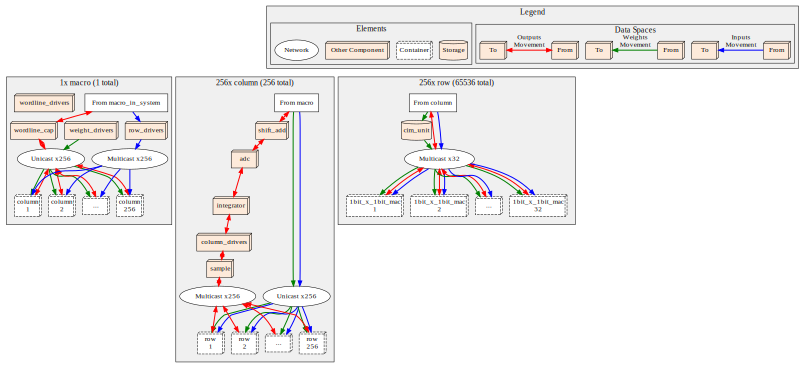

In [1]:
from _tests import scripts
from scripts.notebook_utils import *

display_markdown(
    f"""
Model of "A compute-in-memory chip based on resistive random-access memory",
VLSI 2022
--------------------------------------------------------------------------------

Paper by Weier Wan, Rajkumar Kubendran, Clemens Schaefer, Sukru Burc Eryilmaz,
Wenqiang Zhang, Dabin Wu, Stephen Deiss, Priyanka Raina, He Qian, Bin Gao,
Siddharth Joshi, Huaqiang Wu, H.-S. Philip Wong, and Gert Cauwenberghs 

## Description of The Macro

The macro uses a 256x256 ReRAM array to compute MAC operations. N-bit inputs are
supplied one bit a time as ternary values (positive bits for positive values,
negative bits for negative values, and zero bits for zero values). Outputs from
each column of the array are accumulated in an analog accumulator before being
read out by an ADC. The analog accumulator has the unique ability to accumulate
outputs over multiple cycles, which allows the macro to process variable-bit
inputs, accumulate outputs over multiple cycles, and read out outputs with a
single ADC convert.

{get_important_variables_markdown('wan_nature_2022')}

### Macro Level

- *Input Path*: Inputs are provided to the ternary row drivers to drive rows of
  the array. One input bit is processed in each cycle. For a positive input, the
  driver will supply a positive voltage for a 1 bit and no voltage for a 0 bit.
  For a negative input, the driver will supply a negative voltage for a 1 bit
  and no voltage for a 0 bit. The drivers require N cycles to process an N-bit
  input.
- *Weight Path*: Weight drivers are used to rewrite weights in the array. In the
  array, weights are unsigned values, and negative weights are represented using
  two arrays in parallel (one for positive, one for negative).
- *Output Path*: Outputs are stored in digital circuits which are interspersed
  throughout the array. To tell digital accumulator circuits in the array to
  generate an output bit, wordlines are activated, one for each bit of each
  output being fetched for the array. To charge energy and area for the
  wordlines, we include two components: The wordline capacitance records energy
  for wordline switching, while the wordline drivers account for the area.

Next, there are 256 columns in each macro. Inputs are reused between columns
(*i.e.,* each input-carrying wire connects to all columns), while weights and
outputs are not reused.

### Column Level

- *Input Path*: Each input is sent directly to a row in the column.
- *Weight Path*: Each weight is sent directly to a row in the column.
- *Output Path*: Outputs are accumulated between all the rows in the column.
  After being accumulated, they are read by column drivers, then they appear as
  an analog voltage and are sampled by a sampling circuit. After being sampled,
  each output will be scaled by bit position (i.e., the analog value generated
  by the first input bit is multiplied by 1, the analog value generated by the
  second input bit is multiplied by 2, the analog value generated by the third
  input bit is multiplied by 4, and so on). Scaling by N is accomplished by
  integrating the sampled analog value N times, so processing each additional
  input bit requires twice the number of integration steps as the previous bit.
  After the integrator, the analog output is read by an ADC then passed to a
  shift and add for any required digital accumulation.
  
To address the exponentially-increasing number of integration steps to process
each additional input bit, the paper proposes two integration approaches.

- The first approach, one-phase, processes the first input bit, integrates once,
  processes the second input bit, integrates twice, processes the third input
  bit, integrates four times, and so on. After all input bits are processed, the
  ADC and shift and add read out the output. This approach requires only one ADC
  convert regardless of the number of input bits, but it becomes costly for
  large N due to the high energy and latency of using the integrator many times.
- The second approach, two-phase, will break inputs into 4b slices. For each 4b
  slice, the one-phase approach is used. This approach requires more ADC
  converts (number of input bits divided by 4, rounded up) but limits the
  exponential growth of the number of integration steps.
  
Finally, the ADC is a variable-precision ADC that can optionally read only the
most significant bits of the analog output. This is used in the two-phase
operation to read only the most-significant bits of the lower-order slice. The
upper-order slice is read in full.
  
Next, there are 256 rows in each column. Outputs are reused between rows
(*i.e.,* analog outputs are summed on wires that connect rows), while inputs and
weights are not reused.

### Row Level

In each row, a ReRAM device stores an analog weight.

- *Input Path*: Analog input voltages are used directly for computation.
- *Weight Path*: Analog weights are stored in the CiM unit, which is a single
  ReRAM device.
- *Output Path*: Computed outputs are passed directly up the hierarchy.

Inside the CiM unit, 4xx4 (1b input x 4b weight x 8b output)
virtualized MAC units compute the MAC operation. Note that we chose to use a
4b value for weights, but in reality the weights are fully analog and the
notion of a bit is flexible here.
"""
)
display_diagram(get_diagram("wan_nature_2022", ignore=DIAGRAM_DEFAULT_IGNORE))


   ### Area Breakdown

   This test replicates the results of Fig. 11 (f) of the paper.

   We show the area of the macro and its subcomponents. We report the area of:

   - Neurons, which includes the shift add, adc, integrator, and sample
     components.
   - Array drivers, which includes the wordline drivers, row drivers,
     and column drivers.
   - RRAMs, which includes the CiM units.

   

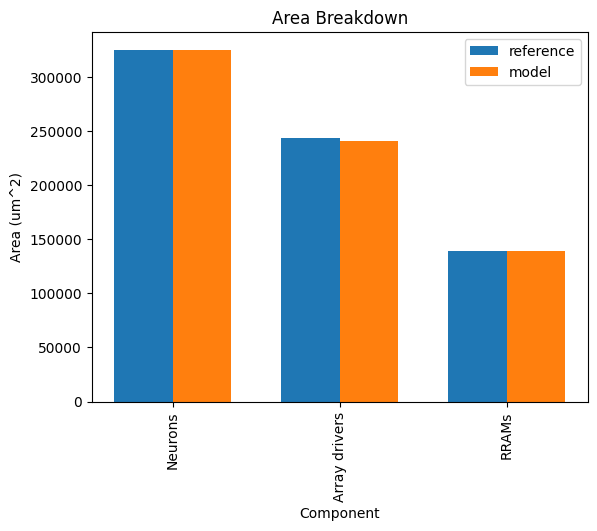

In [2]:
result = run_test("wan_nature_2022", "test_area_breakdown")
bar_side_by_side(
    result[0].get_compare_ref_area()*1e12,
    xlabel="Component",
    ylabel="Area (um^2)",
    title="Area Breakdown",
)


   ### Energy Efficiency and Throughput

   This test replicates the results of Fig. 12 (c) and (d) of the paper.

   We show the area and energy efficiency and throughput of the macro at
   varying numbers of input and output bits. We also compare two-phase and
   one-phase operation.

   Note that this macro uses a signed DAC, which is underutilized for 1b
   inputs. For this reason, 1b and 2b inputs required the same number
   of activations for most circuits, and therefore the energy and throughput
   numbers are similar for 1b and 2b inputs.

   We see that increasing the number of input and output bits decreases the
   energy efficiency and throughput of the macro. This is for two reasons.
   First, processing each additional input bit requires an extra cycle and
   extra activation of most macro components. Second, each additional output
   bit requires additional energy to be consumed by this macro's
   variable-precision ADC.

   We also see that two-phase operation can increase the energy efficiency and
   throughput of the macro for >5 input bits and >7 output bits. This is
   because the macro's integrator requires 2^N timesteps to process results
   from an N-bit input slice. The 2^N scaling can lead to high integrator
   energy and latency when N is large. Two-phase operation breaks inputs into
   two slices to reduce the effect of this scaling. The two-step operation only
   kicks in when there are five or more input bits.
   

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]


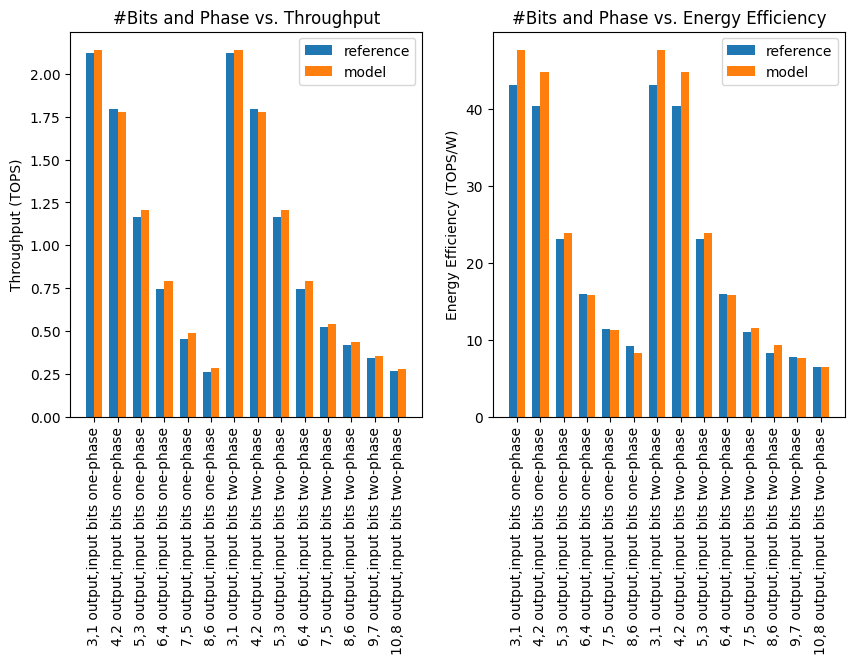

In [3]:
def fmt_name(result):
    obits = result.variables["OUTPUT_BITS"]
    ibits = result.variables["INPUT_BITS"]
    onephase = result.variables["ONE_PHASE"]
    return f"{obits},{ibits} output,input bits {'one' if onephase else 'two'}-phase"


result = run_test("wan_nature_2022", "test_tops")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, target in enumerate(
    [
        ("tops", "Throughput (TOPS)", "Throughput"),
        ("tops_per_w", "Energy Efficiency (TOPS/W)", "Energy Efficiency"),
    ]
):
    bar_side_by_side(
        {fmt_name(r): getattr(r, target[0]) for r in result},
        xlabel="",
        ylabel=target[1],
        title=f"#Bits and Phase vs. {target[2]}",
        ax=ax[i],
    )


   ### Energy Breakdown and Number of Input and Output Bits

   This test replicates the results of Fig. 12 (b) of the paper.

   We show the energy of different components of the macro at varying numbers
   of input and output bits. We will show three categories:

   - Neuron operations and control, which includes the shift_add,
     adc, integrator, and sample components.
   - Input pulses, which includes the row_drivers and cim_unit components.
   - WL (Row) Switching, which includes the wordline_drivers and wordline_cap
     components.

   Note that this macro uses a signed DAC, which is underutilized for 1b
   inputs. For this reason, 1b and 2b inputs required the same number
   of activations for most circuits, and therefore the energy numbers are
   similar for 1b and 2b inputs.

   We see the following:

   - Neuron operations and control energy increases linearly with the number of
     output bits. This is because the variable-precision ADC and control logic
     must process more bits, leading to higher energy consumption.
   - Input pulses energy increases with the number of input bits. Energy
     increases exponentially as the DAC requires 2^N timesteps to process an
     N-bit slice, and there is a jump at 5 input bits, where the macro switches
     to two-phase operation.
   - WL (row) switching energy increases linearly with the number of input
     bits, as the wordlines are used to supply input values.

   

100%|██████████| 8/8 [00:19<00:00,  2.45s/it]


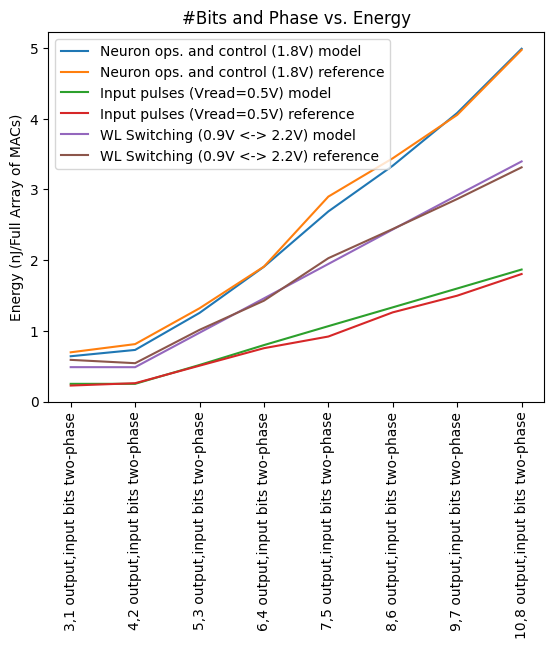

In [6]:
result = run_test("wan_nature_2022", "test_energy_bits_scaling")
organized = {}
for r in result:
    cur_energies = {}
    organized[f"{fmt_name(r)}"] = cur_energies
    for k, v in r.per_component_energy.items():
        cur_energies[f"{k} model"] = v["model"] * 1e9
        cur_energies[f"{k} reference"] = v["reference"] * 1e9
plot(organized, xlabel="", ylabel="Energy (nJ/Full Array of MACs)", title="#Bits and Phase vs. Energy")

Testing workload max_utilization



   ### Exploration of Array Size versus. DNN Energy Efficiency

   In this test, we explore the energy efficiency of the macro at varying array
   sizes for different DNNs. We will set the number of input bits to 8, the
   number of output bits to 10, and we show the area array sizes 64x64,
   128x128, 256x256, 512x512, 1024x1024, and 2048x2048. We will compare the
   energy efficiency of the macro for different DNNs.

   We see that, as the array size increases:

   - Energy for ADC and output processing decreases because the number of array
     rows increases, leading to more analog output reuse and fewer ADC
     converts.
   - Energy for DAC decreases because the number of array columns increases,
     leading to more analog input reuse and fewer DAC converts. Input
     processing energy decreases less than does output processing energy
     because input processing pays energy to drive high-capacitance row wires,
     the capacitance of which increases with the array size. This increase
     cancels some of the energy savings from input reuse.



   increases. This is because the amount of analog output reuse increases,
   leading to lower energy paid for ADC and ADC and digital output sum
   processing. Input processing energy decreases less because input processing
   pays significant energy to supply inputs on high-capacitance bitlines. The
   capacitance of the bitlines increases with the array size, cancelling out
   much of the energy savings from input reuse.

   The energy benefits of larger arrays are strongest for maximum-utilization
   and large-tensor-size workloads. For medium-tensor-size workloads, the
   energy benefits of larger arrays saturate as the array grows larger and
   becomes underutilized for smaller layers. For small-tensor-size workloads,
   underutilization increases energy for all array sizes and leads to a smaller
   array being the lowest-energy choice.
   

100%|██████████| 6/6 [00:41<00:00,  6.87s/it]


Testing workload vision_transformer


100%|██████████| 444/444 [07:10<00:00,  1.03it/s]


Testing workload resnet18


100%|██████████| 126/126 [02:15<00:00,  1.08s/it]


Testing workload mobilenet_v3


100%|██████████| 384/384 [05:21<00:00,  1.19it/s]


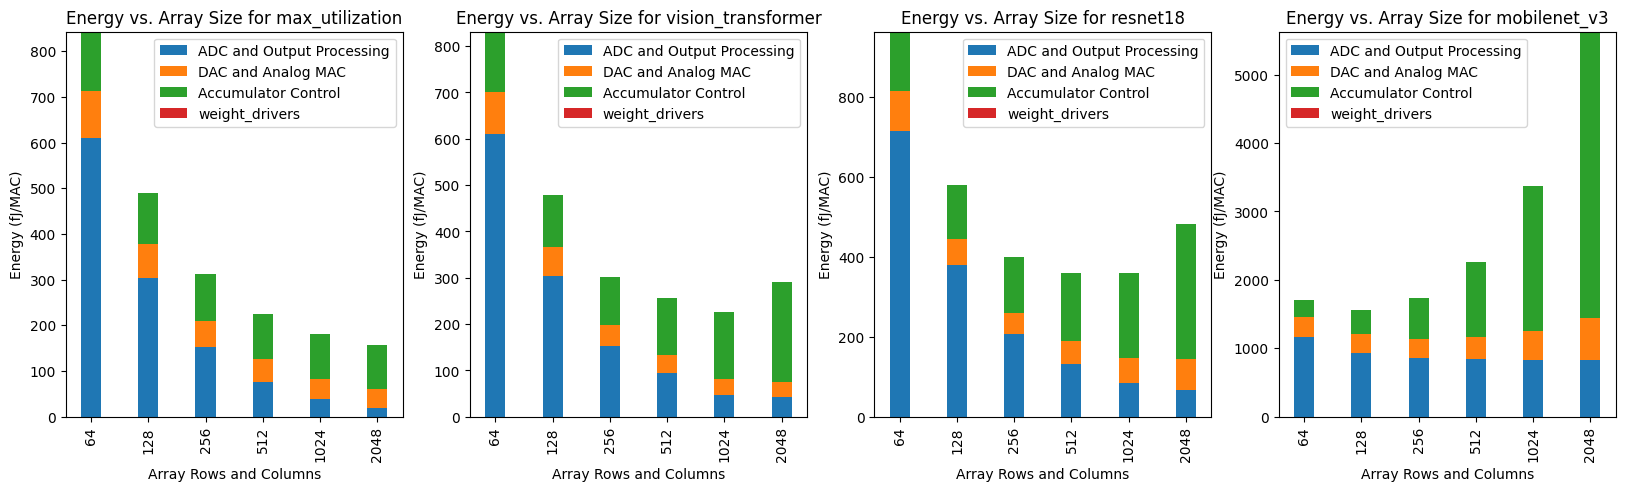

In [5]:
results = {}
for i, dnn in enumerate(
    ["max_utilization", "vision_transformer", "resnet18", "mobilenet_v3"]
):
    print(f"Testing workload {dnn}")
    results[dnn] = run_test(
        "wan_nature_2022", "test_array_size_dnn", dnn_name=dnn, show_doc=i == 0
    )

fig, ax = plt.subplots(1, len(results), figsize=(5 * len(results), 5))
for i, (dnn, result) in enumerate(results.items()):
    bar_stacked(
        {r.variables["ARRAY_ROWS"]: r.per_compute("per_component_energy")*1e15 for r in result},
        xlabel="Array Rows and Columns",
        ylabel="Energy (fJ/MAC)",
        title=f"Energy vs. Array Size for {dnn}",
        ax=ax[i],
        missing_ok=True
    )